In [ ]:
import json
import tensorflow as tf

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization,Conv2D, GlobalAveragePooling1D

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
vocab_size = 19469
embedding_dim = 16
max_length = 120
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"
training_size = 9600


In [ ]:
import pandas as pd
# colnames = ['name', 'Profile Link', 'Facebook ID', 'label', 'comment','time','Category','Gender','link','page name','post time','post content','comment react number']
data = pd.read_excel(r'without racism.xlsx', sheet_name='Sheet1')

In [ ]:
name = data['name'].values.tolist()
label = data['label'].values.tolist()
comment = data['comment'].values.tolist()
category = data['Category'].values.tolist()
gender = data['Gender'].values.tolist()
print(label[0])

sexual


In [ ]:
stopwords = [ "অতএব","অথচ","অথবা","অনুযায়ী","অনেক","অনেকে","অনেকেই","অন্তত","অন্য","অবধি","অবশ্য","অর্থাত","আই","আগামী","আগে","আগেই","আছে","আজ","আদ্যভাগে","আপনার","আপনি","আবার","আমরা","আমাকে","আমাদের","আমার","আমি","আর","আরও","ই","ইত্যাদি","ইহা","উচিত","উত্তর","উনি","উপর","উপরে","এ","এঁদের","এঁরা","এই","একই","একটি","একবার","একে","এক্","এখন","এখনও","এখানে","এখানেই","এটা","এটাই","এটি","এত","এতটাই","এতে","এদের","এব","এবং","এবার","এমন","এমনকী","এমনি","এর","এরা","এল","এস","এসে","ঐ","ও","ওঁদের","ওঁর","ওঁরা","ওই","ওকে","ওখানে","ওদের","ওর","ওরা","কখনও","কত","কবে","কমনে","কয়েক","কয়েকটি","করছে","করছেন","করতে","করবে","করবেন","করলে","করলেন","করা","করাই","করায়","করার","করি","করিতে","করিয়া","করিয়ে","করে","করেই","করেছিলেন","করেছে","করেছেন","করেন","কাউকে","কাছ","কাছে","কাজ","কাজে","কারও","কারণ","কি","কিংবা","কিছু","কিছুই","কিন্তু","কী","কে","কেউ","কেউই","কেখা","কেন","কোটি","কোন","কোনও","কোনো","ক্ষেত্রে","কয়েক","খুব","গিয়ে","গিয়েছে","গিয়ে","গুলি","গেছে","গেল","গেলে","গোটা","চলে","চান","চায়","চার","চালু","চেয়ে","চেষ্টা","ছাড়া","ছাড়াও","ছিল","ছিলেন","জন","জনকে","জনের","জন্য","জন্যওজে","জানতে","জানা","জানানো","জানায়","জানিয়ে","জানিয়েছে","জে","জ্নজন","টি","ঠিক","তখন","তত","তথা","তবু","তবে","তা","তাঁকে","তাঁদের","তাঁর","তাঁরা","তাঁাহারা","তাই","তাও","তাকে","তাতে","তাদের","তার","তারপর","তারা","তারৈ","তাহলে","তাহা","তাহাতে","তাহার","তিনঐ","তিনি","তিনিও","তুমি","তুলে","তেমন","তো","তোমার","থাকবে","থাকবেন","থাকা","থাকায়","থাকে","থাকেন","থেকে","থেকেই","থেকেও","দিকে","দিতে","দিন","দিয়ে","দিয়েছে","দিয়েছেন","দিলেন","দু","দুই","দুটি","দুটো","দেওয়া","দেওয়ার","দেওয়া","দেখতে","দেখা","দেখে","দেন","দেয়","দ্বারা","ধরা","ধরে","ধামার","নতুন","নয়","না","নাই","নাকি","নাগাদ","নানা","নিজে","নিজেই","নিজেদের","নিজের","নিতে","নিয়ে","নিয়ে","নেই","নেওয়া","নেওয়ার","নেওয়া","নয়","পক্ষে","পর","পরে","পরেই","পরেও","পর্যন্ত","পাওয়া","পাচ","পারি","পারে","পারেন","পি","পেয়ে","পেয়্র্","প্রতি","প্রথম","প্রভৃতি","প্রযন্ত","প্রাথমিক","প্রায়","প্রায়","ফলে","ফিরে","ফের","বক্তব্য","বদলে","বন","বরং","বলতে","বলল","বললেন","বলা","বলে","বলেছেন","বলেন","বসে","বহু","বা","বাদে","বার","বি","বিনা","বিভিন্ন","বিশেষ","বিষয়টি","বেশ","বেশি","ব্যবহার","ব্যাপারে","ভাবে","ভাবেই","মতো","মতোই","মধ্যভাগে","মধ্যে","মধ্যেই","মধ্যেও","মনে","মাত্র","মাধ্যমে","মোট","মোটেই","যখন","যত","যতটা","যথেষ্ট","যদি","যদিও","যা","যাঁর","যাঁরা","যাওয়া","যাওয়ার","যাওয়া","যাকে","যাচ্ছে","যাতে","যাদের","যান","যাবে","যায়","যার","যারা","যিনি","যে","যেখানে","যেতে","যেন","যেমন","র","রকম","রয়েছে","রাখা","রেখে","লক্ষ","শুধু","শুরু","সঙ্গে","সঙ্গেও","সব","সবার","সমস্ত","সম্প্রতি","সহ","সহিত","সাধারণ","সামনে","সি","সুতরাং","সে","সেই","সেখান","সেখানে","সেটা","সেটাই","সেটাও","সেটি","স্পষ্ট","স্বয়ং","হইতে","হইবে","হইয়া","হওয়া","হওয়ায়","হওয়ার","হচ্ছে","হত","হতে","হতেই","হন","হবে","হবেন","হয়","হয়তো","হয়নি","হয়ে","হয়েই","হয়েছিল","হয়েছে","হয়েছেন","হল","হলে","হলেই","হলেও","হলো","হাজার","হিসাবে","হৈলে","হোক","হয়" ]
for i in range(len(comment)):
  for word in stopwords:
    comment[i] = comment[i].replace(" "+word+" "," ")
    comment[i] = comment[i].replace("  "," ")

In [ ]:
def encode_and_bind(original_dataframe, feature_to_encode):
    dummies = pd.get_dummies(original_dataframe[[feature_to_encode]])
    res = pd.concat([original_dataframe, dummies], axis=1)
    res = res.drop([feature_to_encode], axis=1)
    return(res)
# data = encode_and_bind(data, 'Gender')
# gender_female = data['Gender_Female'].values.tolist()
# gender_male = data['Gender_Male'].values.tolist()
# data = encode_and_bind(data, 'Category')
# category_actor = data['Category_Actor'].values.tolist()
# category_politician = data['Category_Politician'].values.tolist()
# category_singer = data['Category_Singer'].values.tolist()
# category_social = data['Category_Social'].values.tolist()
# category_sports = data['Category_Sports'].values.tolist()

In [ ]:
label2D = pd.get_dummies(data[['label']])
data = encode_and_bind(data, 'label')
label_not_bully = data['label_not bully'].values.tolist()
label_religious = data['label_religious'].values.tolist()
label_sexual = data['label_sexual'].values.tolist()
label_threat = data['label_threat'].values.tolist()
label_troll = data['label_troll'].values.tolist()

In [ ]:
tokenizer = Tokenizer(oov_token="<OOV>")
tokenizer.fit_on_texts(comment)
word_index = tokenizer.word_index
print(word_index)
sequences = tokenizer.texts_to_sequences(comment)
padded = pad_sequences(sequences, padding='post')
print(padded.shape)

{'<OOV>': 1, 'নাস্তিক': 2, 'বিশ্বাস': 3, 'আল্লাহ': 4, 'তুই': 5, 'না': 6, 'কথা': 7, 'একটা': 8, 'তোর': 9, 'সাফা': 10, 'হিরো': 11, 'ভাই': 12, 'আলম': 13, 'ভালো': 14, 'ক্ষমা': 15, 'মানুষ': 16, 'না।': 17, 'দিয়ে': 18, 'কবির': 19, 'হয়ে': 20, '।': 21, 'আল্লাহর': 22, 'মাগি': 23, 'ভুল': 24, 'আপনাকে': 25, 'সাথে': 26, 'মত': 27, 'পরকাল': 28, 'সুন্দর': 29, 'এই': 30, 'সবাই': 31, 'কমেন্ট': 32, 'বাবা': 33, 'দান': 34, 'খান': 35, 'টা': 36, 'একজন': 37, 'নাটক': 38, 'নাস্তিকের': 39, 'এক': 40, 'যায়': 41, 'বিচার': 42, 'মুসলিম': 43, 'বাচ্চা': 44, 'মা': 45, 'গালি': 46, 'তর': 47, 'নাই': 48, 'আমি': 49, 'বড়': 50, 'হেদায়েত': 51, 'ধন্যবাদ': 52, 'জন্ম': 53, 'পরকালে': 54, 'কি': 55, 'মানুষের': 56, 'জুতা': 57, 'ইসলাম': 58, 'সময়': 59, 'করুন': 60, 'পাগল': 61, 'ছবি': 62, 'জায়েদ': 63, 'নাম': 64, 'হবে': 65, 'মেয়ে': 66, 'আপু': 67, 'খানকি': 68, 'তোমাকে': 69, 'কিভাবে': 70, 'আপনি': 71, 'বাল': 72, 'ভাল': 73, 'করে': 74, 'এসব': 75, 'চাই': 76, 'একটু': 77, 'মাফ': 78, 'তোরে': 79, 'আছে': 80, 'দিয়া': 81, 'তুমি': 82, 'দরকার': 83, 'আমিন': 

In [ ]:
# label2D = label2D.drop(['label_not bully'], axis=1)
# label2D = label2D.drop(['label_racism'], axis=1)
# label2D = label2D.drop(['label_religious'], axis=1)
# label2D = label2D.drop(['label_threat'], axis=1)
# label2D = label2D.drop(['label_troll'], axis=1)

# testing_labels = label2D[training_size:]
# training_labels = label2D[0:training_size]
print(len(label2D))

44001


In [ ]:
# training_sentences = comment[0:training_size]
# testing_sentences = comment[training_size:]
#training_label = label_troll[0:training_size]
#testing_label = label_troll[training_size:]
from sklearn.model_selection import train_test_split
X = comment
Y = label2D

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=15, test_size=0.15)

testing_labels = Y_test
training_labels = Y_train

In [ ]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(X_train)

word_index = tokenizer.word_index

training_sequences = tokenizer.texts_to_sequences(X_train)
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(X_test)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

In [ ]:
Y_train

,label_not bully,label_religious,label_sexual,label_threat,label_troll
9696,1,0,0,0,0
35731,0,0,0,0,1
24500,0,0,1,0,0
9995,0,0,0,0,1
40550,1,0,0,0,0
...,...,...,...,...,...
35483,0,0,1,0,0
39296,1,0,0,0,0
2693,0,0,1,0,0
8076,0,0,0,0,1


In [ ]:
X[12140]

'কলিজার ভাইটি'

In [ ]:
import numpy as np
training_padded = np.array(training_padded)
testing_padded = np.array(testing_padded)
testing_labels = np.array(testing_labels)
training_labels = np.array(training_labels)


In [ ]:
type(label2D)
#testing_labels = label2D[training_size:]
#training_labels = label2D[0:training_size]
print(testing_labels.shape)
print(training_labels.shape)
# training_labels[0].shape

print(label2D.shape)

(6601, 5)
(37400, 5)
(44001, 5)


In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'),
    tf.keras.layers.LSTM(100, dropout=0.2,return_sequences=True,  recurrent_dropout=0.2),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(5, activation='softmax')
])
model.compile(loss='categorical_crossentropy',optimizer='rmsprop',metrics=['accuracy'])

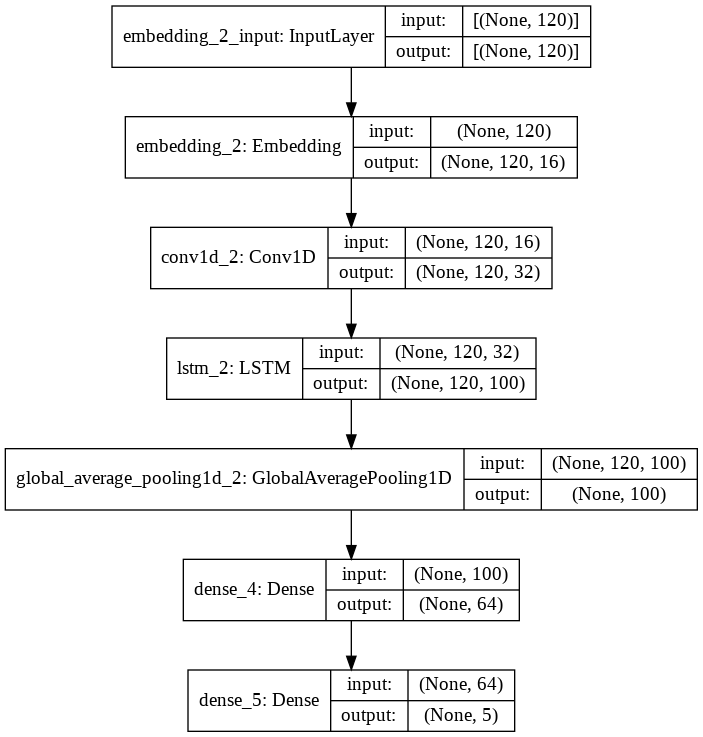

In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(model, show_shapes=True, to_file='model2.png')

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 120, 16)           311504    
_________________________________________________________________
conv1d (Conv1D)              (None, 120, 32)           1568      
_________________________________________________________________
lstm (LSTM)                  (None, 120, 100)          53200     
_________________________________________________________________
global_average_pooling1d (Gl (None, 100)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                6464      
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 325       
Total params: 373,061
Trainable params: 373,061
Non-trainable params: 0
__________________________________________________

In [ ]:
print(training_padded.shape)
print(training_labels.shape)
print(testing_padded.shape)
print(testing_labels.shape)
num_epochs = 15
history = model.fit(training_padded, training_labels, epochs=num_epochs, validation_data=(testing_padded, testing_labels),
                   callbacks = [
        tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=15), #stop training if accuracy doesn't improve in next 3 epoch
        tf.keras.callbacks.ModelCheckpoint('model_best.hdf5', monitor='val_loss', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', save_frequency=1)
    ])

(37400, 120)
(37400, 5)
(6601, 120)
(6601, 5)
Epoch 1/15
1169/1169 [==============================] - 264s 224ms/step - loss: 1.3452 - accuracy: 0.4140 - val_loss: 0.9938 - val_accuracy: 0.6035

Epoch 00001: val_loss improved from inf to 0.99380, saving model to model_best.hdf5
Epoch 2/15
1169/1169 [==============================] - 263s 225ms/step - loss: 0.9272 - accuracy: 0.6421 - val_loss: 0.8589 - val_accuracy: 0.6767

Epoch 00002: val_loss improved from 0.99380 to 0.85889, saving model to model_best.hdf5
Epoch 3/15
1169/1169 [==============================] - 261s 223ms/step - loss: 0.7554 - accuracy: 0.7417 - val_loss: 0.7641 - val_accuracy: 0.7464

Epoch 00003: val_loss improved from 0.85889 to 0.76412, saving model to model_best.hdf5
Epoch 4/15
1169/1169 [==============================] - 261s 224ms/step - loss: 0.6751 - accuracy: 0.7811 - val_loss: 0.7000 - val_accuracy: 0.7626

Epoch 00004: val_loss improved from 0.76412 to 0.70001, saving model to model_best.hdf5
Epoch 5/15

In [ ]:
# from tensorflow import keras
# model = keras.models.load_model('model_best.hdf5')
print('commented')

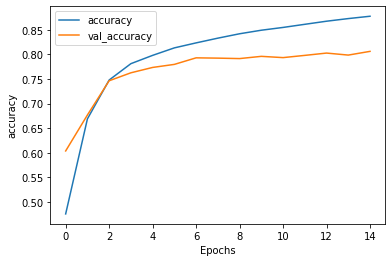

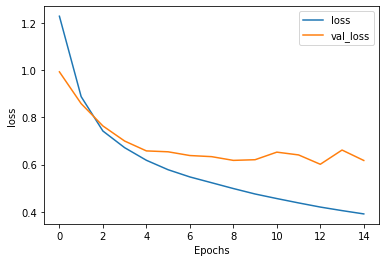

In [ ]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [ ]:
sentence = ['চেহারা দেখলে বমি আসে']    
sequences = tokenizer.texts_to_sequences(sentence)
padded = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

pred=model.predict(padded)[0]
print(pred)
# for z in range(len(pred)):
#     if pred[z]>0.5:
#         print(label2D.columns[z].replace('label_',""))
        
print('Not Bully : '+str(pred[0]))
print('Religious : '+str(pred[1]))
print('Sexual : '+str(pred[2]))
print('Troll : '+str(pred[4]))
print('Threat : '+str(pred[3])) 

[0.01749992 0.00223042 0.02800086 0.01309972 0.93916905]
Not Bully : 0.017499922
Religious : 0.0022304168
Sexual : 0.028000863
Troll : 0.93916905
Threat : 0.01309972


In [ ]:
# import os
# print(os.listdir('/content/drive/My Drive/Colab Notebooks/datasets/Bully/'))

# df = pd.read_excel(r'/content/drive/My Drive/Colab Notebooks/datasets/Bully/CopyOfMargedall.xlsx', sheet_name='Sheet1')

In [ ]:
# from tqdm import tqdm
# label=[]
# accuracy=[]
# for i in tqdm(range(len(df['comment']))):
#   notpred=True
#   sentence = [df['comment'][i]]
#   sequences = tokenizer.texts_to_sequences(sentence)
#   padded = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

#   pred=model.predict(padded)[0]
#   top=np.argsort(pred)[-1]
#   label.append(label2D.columns[top].replace('label_',""))
#   accuracy.append(pred[top])

In [ ]:
# print(len(label))

In [ ]:
# df.tail()

In [ ]:
# from pandas import ExcelWriter
# # df.insert(loc=4, column='label', value=label)
# # df.insert(loc=5, column='accuracy', value=accuracy)
# writer = ExcelWriter('/content/drive/My Drive/Colab Notebooks/datasets/Bully/MargedallWithLabel.xlsx')
# df.to_excel(writer,'Sheet1')
# writer.save()

In [ ]:
# sentence = ['অই বেশ্যার কথাগুলো শুনলেই বুঝা যায় কি চমৎকার ডায়লগ সাজিয়েছে। পশুর বাচ্চারা।কিভাবে সংলাপ গুলো বানিয়েছে। মহিলার বাড়িতে একবার গেছি আর কোনো দিন যাবনা বিশ্বাস কর।... অভিশপ্ত নাস্তিকরা মনে করে ওদের অপকর্ম মানুষ বুঝবে না। মানুষ কি ওদের মত বলদ চোদা। অই বেশ্যা কন্ঠে কতরকম ভাবে ডায়ালগ দিয়েছে মনের মাধুরী মিশিয়ে আর মাওলানা সাঈদীর কন্ঠ ডাবিং করে জুড়ে দিয়েছে। কয়দিন করবে এসব? শেষ রক্ষা হবে তো?']
# sequences = tokenizer.texts_to_sequences(sentence)
# padded = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

# pred=model.predict(padded)[0]
# top=np.argsort(pred)[-1]
# print(label2D.columns[top].replace('label_',""))
# print(pred)

In [ ]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_sentence(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

print(decode_sentence(training_padded[2]))
print(X_train[2])
print(reverse_word_index[1])

পেজ টা তে ফলোয়ার বাড়াইতে আসচে ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ?
পেজ টা তে ফলোয়ার বাড়াইতে আসচে
<OOV>


In [ ]:
e = model.layers[0]
weights = e.get_weights()[0]
print(weights.shape) # shape: (vocab_size, embedding_dim)

(19469, 16)


In [ ]:
import io

out_v = io.open('vecs.tsv', 'w', encoding='utf-8')
out_m = io.open('meta.tsv', 'w', encoding='utf-8')
for word_num in range(1, 19468 ):
  word = reverse_word_index[word_num]
  embeddings = weights[word_num]
  out_m.write(word + "\n")
  out_v.write('\t'.join([str(x) for x in embeddings]) + "\n")
out_v.close()
out_m.close()

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


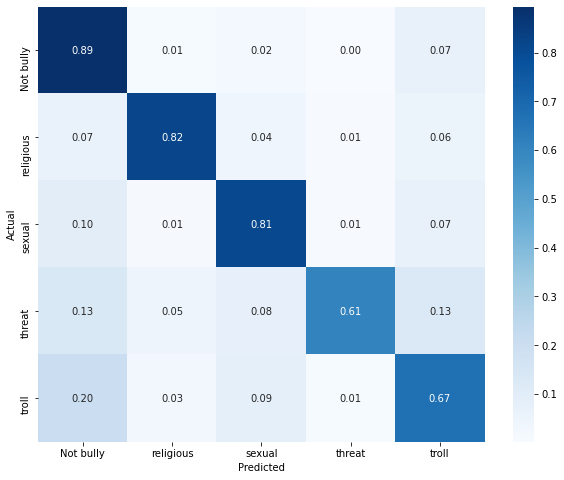

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
import seaborn as sns
rounded_predictions = model.predict_classes(testing_padded, verbose=0)
rounded_labels=np.argmax(testing_labels, axis=1)
# print(testing_labels)
cm = confusion_matrix(y_true=rounded_labels, y_pred=rounded_predictions)
cm_plot_labels = ['Not bully', 'religious','sexual','threat','troll']
#plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(cmn, annot=True, fmt='.2f', xticklabels=cm_plot_labels, yticklabels=cm_plot_labels, cmap='Blues')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show(block=False)

5 class model report

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(rounded_labels,rounded_predictions))

              precision    recall  f1-score   support

           0       0.79      0.89      0.84      2357
           1       0.90      0.82      0.86      1084
           2       0.81      0.81      0.81      1389
           3       0.81      0.61      0.70       252
           4       0.74      0.67      0.70      1519

    accuracy                           0.80      6601
   macro avg       0.81      0.76      0.78      6601
weighted avg       0.80      0.80      0.80      6601



In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

testy = rounded_labels
yhat_classes = rounded_predictions
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(testy, yhat_classes)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(testy, yhat_classes,average='micro')
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(testy, yhat_classes,average='micro')
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(testy, yhat_classes,average='macro')
print('F1 score: %f' % f1)

Accuracy: 0.802757
Precision: 0.802757
Recall: 0.802757
F1 score: 0.783118


In [ ]:
import pickle

with open('bullyvariables.pkl', 'wb') as f:  # Python 3: open(..., 'wb')
    pickle.dump([tokenizer, max_length, padding_type,trunc_type], f)

In [ ]:
model.save('/content/drive/MyDrive/Colab Notebooks/model/bully/latestModel.hdf5')

In [ ]:
dfResult = pd.read_excel('/content/comments.xlsx')
comments = dfResult['comment'].values.tolist()

In [ ]:
from tqdm import tqdm
predLabel=[]
for i in tqdm(range(len(comments))):
  sentence = [comments[i]]
  # print(sentence)
  sequences = tokenizer.texts_to_sequences(sentence)
  padded = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

  pred=np.argmax((model.predict(padded)))
  predLabel.append(pred)

100%|██████████| 44001/44001 [43:32<00:00, 16.84it/s]


In [ ]:
df = pd.read_excel('')

In [ ]:
Result_data = pd.DataFrame({'comment':comments,
                           'pred5':predLabel})
Result_data.to_excel(r'Prediction.xlsx',index = False)